In [47]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data=[]
with open("/zombies_data - Sheet1.csv","r") as f:
  reader=csv.reader(f)
  next(reader)
  for row in reader:
    if len(row)<3:
      continue
    try:
      speed=float(row[0])
      ammo=float(row[1])
      label=float(row[2])
      data.append([speed,ammo,label])
    except:
      continue

In [49]:
data=np.array(data)
X=data[:, :2]
y=data[:, 2]
X_min=X.min(axis=0)
X_max=X.max(axis=0)
X_norm=(X-X_min)/(X_max-X_min)
m=X_norm.shape[0]
X_bias=np.hstack((np.ones((m,1)),X_norm))
print("X_bias shape:", X_bias.shape)

X_bias shape: (22, 3)


In [50]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
def compute_cost(X,y,theta):
  m=len(y)
  h=sigmoid(X@theta)
  cost=-(1/m)*np.sum(y*np.log(h+1e-8)+(1-y)*np.log(1-h+1e-8))
  return cost
def gradient_descent(X,y,theta,lr,iterations):
  m=X.shape[0]
  y=y.reshape(-1,1)
  theta=theta.reshape(-1,1)
  cost_history=[]
  for i in range(iterations):
    h=sigmoid(X@theta)
    gradient=(1/m)*(X.T@(h-y))
    theta=theta-lr*gradient
    cost=compute_cost(X,y,theta)
    cost_history.append(cost)
    if i%100==0:
      print(f"Iteration {i}: Cost {cost}")
  return theta,cost_history

In [51]:
theta=np.zeros(X_bias.shape[1])
learning_rate=0.1
iterations=2000

theta,cost_history=gradient_descent(X_bias,y,theta,learning_rate,iterations)

Iteration 0: Cost 0.6903175686060613
Iteration 100: Cost 0.5980032947452923
Iteration 200: Cost 0.5474863473395528
Iteration 300: Cost 0.5048883064140557
Iteration 400: Cost 0.4686399028392848
Iteration 500: Cost 0.4375402127432016
Iteration 600: Cost 0.41063797135236013
Iteration 700: Cost 0.38717961387391564
Iteration 800: Cost 0.3665669005844723
Iteration 900: Cost 0.34832305840319827
Iteration 1000: Cost 0.33206614941915846
Iteration 1100: Cost 0.31748834625359124
Iteration 1200: Cost 0.3043399038786396
Iteration 1300: Cost 0.29241679530476833
Iteration 1400: Cost 0.2815511713341997
Iteration 1500: Cost 0.27160398238068145
Iteration 1600: Cost 0.2624592508003929
Iteration 1700: Cost 0.254019603175399
Iteration 1800: Cost 0.2462027663292886
Iteration 1900: Cost 0.23893880302340473


In [53]:
test_runner=np.array([25,1])
test_runner_norm=(test_runner-X_min)/(X_max-X_min)
test_runner_bias=np.hstack((np.ones(1),test_runner_norm))
prob=sigmoid(test_runner_bias@theta).item()
prediction=1 if prob>=0.5 else 0
print(f"Test Prediction: Runner: 25 km/h, 1 Ammo Clip -> Survive Probability: {prob:.4f} -> {'Survive' if prediction==1 else 'Infected'}")

Test Prediction: Runner: 25 km/h, 1 Ammo Clip -> Survive Probability: 0.9281 -> Survive


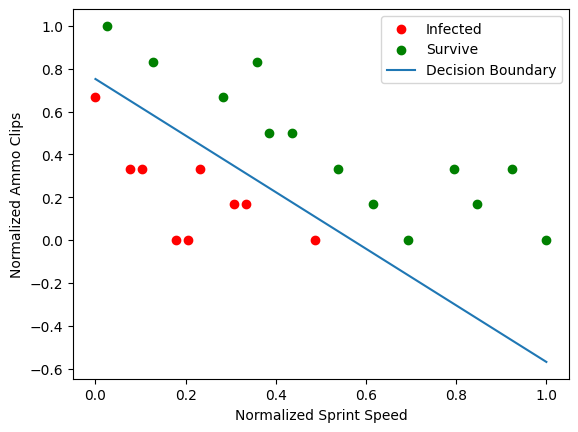

In [54]:
plt.scatter(X_norm[y==0][:,0], X_norm[y==0][:,1], color='red', label='Infected')
plt.scatter(X_norm[y==1][:,0], X_norm[y==1][:,1], color='green', label='Survive')
x_values = np.array([0, 1])
y_values = -(theta[0] + theta[1]*x_values) / theta[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel("Normalized Sprint Speed")
plt.ylabel("Normalized Ammo Clips")
plt.legend()
plt.show()